<a href="https://colab.research.google.com/github/Jucicarla/analise-de-sentimento/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**An√°lise de Sentimentos usando TextBlob: Analisar coment√°rios postados por usu√°rios sobre restaurantes.**

**Introdu√ß√£o**

Os coment√°rios dos usu√°rios s√£o uma parte significativa da imagem organizacional, os usu√°rios est√£o cada vez mais compartilhando suas experi√™ncias boas ou ruins, assim como consultam outras experi√™ncias semelhantes de outros usu√°rios.

Esse trabalho consiste na an√°lise de sentimentos de coment√°rios coletados da web, tendo como base de dados 100.000 coment√°rios relacionados a opini√µes de restaurantes pelo Brasil do site TripAdvisor. 


1.   TextBlob: √© uma biblioteca de software livre para processar dados textuais, fornecendo uma API simples para NLP.
2.   An√°lise de Sentimento:

    *   Polaridade: representa o grau de positividade ou negatividade de um texto (positivo, negativo e neutro)
    *   Senten√ßas: Subjetiva(√© o que se quer analisar) e Objetiva(factuais)















#**Instala√ß√£o do pacote googletrans** 

In [1]:
!pip install googletrans

# **Instala√ß√£o do pacote TextBlob**

In [2]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


# **Importa√ß√£o de Bibliotecas**

In [10]:
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd
from googletrans import Translator
import time
import json
# montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1 - **Prepara√ß√£o e explora√ß√£o dos dados**


*   Coleta
*   Prepara√ß√£o e Limpeza dos dados
*   An√°lise Explorat√≥ria de Dados





## 1.1 ‚Äî Coleta de dados: a fonte de dados j√° foi selecionada pelo professor e disponibilizado no endere√ßo: http://tiagodemelo.info/datasets/dataset-v2.dat

In [11]:
arquivo = '/content/drive/MyDrive/dataset-v2.dat'
d = []
with open(arquivo) as infile:
  for line in infile:
    try:
      item = json.loads(line.strip())
      d.append(item)
    except:
      None

**Cria√ß√£o do DataFrame com os 100.000 mil coment√°rios.**

In [12]:
#criou um DataFrame a partir de um dataset
df = pd.DataFrame(d)

In [13]:
df

title  ...                                       itemReviewed
0                                   Jantar   ...  {'name': 'Imperador dos Camar√µes', 'address': ...
1                      Uma boa experi√™ncia.  ...  {'name': 'Guacamole Natal', 'address': {'stree...
2                        Otimo self service  ...  {'name': 'Chica Pitanga', 'address': {'streetA...
3      O sorvete mais tradicional do estado  ...  {'name': 'Sorvetes Vi Sabor', 'address': {'str...
4                         Melhor hamburger!  ...  {'name': 'Z Deli Sandwich Shop', 'address': {'...
...                                     ...  ...                                                ...
99995                Nova op√ß√£o no Paseo!!!  ...  {'name': 'Boteco Maestro', 'address': {'street...
99996                                   Bom  ...  {'name': 'Casa do Marqu√™s', 'address': {'stree...
99997                               Bom bar  ...  {'name': 'Rio Scenarium', 'address': {'streetA...
99998                  Me senti enganada...  ...  {'name': 'Celeiro', 'address': {'streetAddress...
99999                 Restaurante excelente  ...  {'name': 'Coco Bambu Manaus', 'address': {'str...

[100000 rows x 12 columns]

**Armazenar os 200 coment√°rios para an√°lise**

In [15]:
dataset = pd.read_json('/content/drive/MyDrive/dataset-v2.dat',lines=True)
dataset_200_line = dataset.sample(200)

In [16]:
dataset_200_line

title  ...                                       itemReviewed
76258             Pode melhorar  ...  {'name': 'Basilico Ristorante Italiano', 'addr...
84136               Muito bom!!  ...  {'name': 'Ernesto caf√©/bar', 'address': {'stre...
96926     Ambiente muito bonito  ...  {'name': 'Tak√™do', 'address': {'streetAddress'...
40463  Hamb√∫rguer show de bola   ...  {'name': 'Nossa Carne', 'address': {'streetAdd...
1728                      Massa  ...  {'name': 'Mamma Rosa', 'address': {'streetAddr...
...                         ...  ...                                                ...
43795                Muito bom   ...  {'name': 'Amado', 'address': {'streetAddress':...
90263                  Pizzaria  ...  {'name': 'Vila Mosquito', 'address': {'streetA...
49226      simples mas saboroso  ...  {'name': 'Churrascaria Giovanaz', 'address': {...
20164     √ìtimo restaurante....  ...  {'name': 'Imperador dos Camar√µes', 'address': ...
42421                Encantador  ...  {'name': '√ìpera Arte', 'address': {'streetAddr...

[200 rows x 12 columns]

##**1.2 Prepara√ß√£o e Limpeza dos dados**
Hora de normalizar os dados, aplicar um padr√£o √∫nico de entrada.

Descompactar a coluna itemReviewed, para normalizar.

In [32]:
itemReviewed = pd.json_normalize(dataset_200_line['itemReviewed'])

In [34]:
itemReviewed

name  ... address.country
0    Basilico Ristorante Italiano  ...          Brasil
1                Ernesto caf√©/bar  ...          Brasil
2                          Tak√™do  ...          Brasil
3                     Nossa Carne  ...          Brasil
4                      Mamma Rosa  ...          Brasil
..                            ...  ...             ...
195                         Amado  ...          Brasil
196                 Vila Mosquito  ...          Brasil
197         Churrascaria Giovanaz  ...          Brasil
198        Imperador dos Camar√µes  ...          Brasil
199                    √ìpera Arte  ...          Brasil

[200 rows x 10 columns]

Uni√£o do dataset gerado pela coluna que foi tratada com o dataset inicial que cont√©m todos os dados.

In [33]:
dataset_full = pd.DataFrame.join(dataset_200_line, itemReviewed)

Remo√ß√£o da coluna que cont√©m os dados n√£o tratados.

In [ ]:
dataset_full.drop(columns=['itemReviewed'])

title  ...  address.country
98166                                          Muito bom  ...              NaN
94973  Se voc√™ conseguir entrar, certamente ficar√° sa...  ...              NaN
31899    Uma nova surpresa agrad√°vel na cozinha regional  ...              NaN
24753                                  Sensacional!!!!!!  ...              NaN
44599              Comida, bebida e m√∫sica de qualidade!  ...              NaN
...                                                  ...  ...              ...
67498                                         Comida boa  ...              NaN
45449  Pi√∫ shopping Iguatemi - grosseria, desrespeito...  ...              NaN
66142                                       Maravilhoso   ...              NaN
72528                                    Comida saborosa  ...              NaN
9899                                     Muita variedade  ...              NaN

[200 rows x 21 columns]

## 1.3 - An√°lise Explorat√≥ria de Dados

√â aqui onde exploramos nossos dados, ap√≥s serem limpos, aplicando uma infinidade de t√©cnicas para entend√™-los.

Na explora√ß√£o de dados tamb√©m aplicamos tamb√©m v√°rias t√©cnicas de visualiza√ß√£o, plotando nossas vari√°veis atrav√©s de gr√°ficos, cada qual para um tipo correspondente de vari√°vel.

Dataset final a ser trabalhado.

In [ ]:
dataset_full

title  ...  address.country
98166                                          Muito bom  ...              NaN
94973  Se voc√™ conseguir entrar, certamente ficar√° sa...  ...              NaN
31899    Uma nova surpresa agrad√°vel na cozinha regional  ...              NaN
24753                                  Sensacional!!!!!!  ...              NaN
44599              Comida, bebida e m√∫sica de qualidade!  ...              NaN
...                                                  ...  ...              ...
67498                                         Comida boa  ...              NaN
45449  Pi√∫ shopping Iguatemi - grosseria, desrespeito...  ...              NaN
66142                                       Maravilhoso   ...              NaN
72528                                    Comida saborosa  ...              NaN
9899                                     Muita variedade  ...              NaN

[200 rows x 22 columns]

#**2 - Vis√£o Geral dos DADOS**

##**Histograma**

Histogramas s√£o √∫teis para visualizar a distribui√ß√£o de uma s√©rie de valores

**Ser√° que existe diferen√ßa de tamanho (caracteres) do coment√°rio?**

In [41]:
#Criando uma coluna que contemplar√° a quantidade de caracteres de cada coment√°rios
dataset_full['Tamanho_texto'] = dataset_full['reviewBody'].apply(len)

In [42]:
dataset_full['Tamanho_texto']

76258    216
84136    228
96926    311
40463    243
1728     156
        ... 
43795    124
90263    239
49226    490
20164    285
42421    113
Name: Tamanho_texto, Length: 200, dtype: int64

**Histograma, abaixo, mostra apenas que h√° coment√°rios mais longos que os demais.**

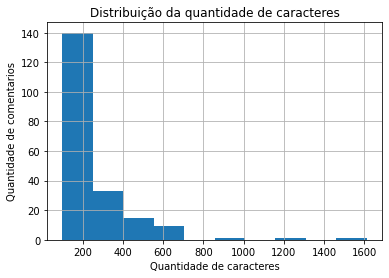

In [57]:
dataset_full.Tamanho_texto.hist()
plt.xlabel("Quantidade de caracteres")
plt.ylabel("Quantidade de comentarios")
plt.title("Distribui√ß√£o da quantidade de caracteres")
plt.show()

## Qual a distribui√ß√£o das estrelas dos participantes da pesquisa?
## A maioria dos participantes deram conceitos na  faixa entre 3 a 5 estrelas, sendo 5 a mais frequente.

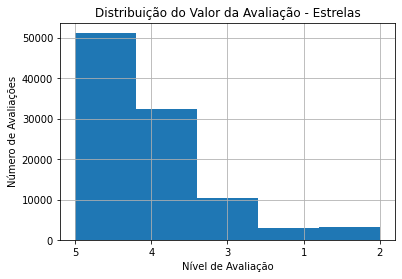

In [35]:
df.ratingValue.hist(bins = 5)
plt.xlabel("N√≠vel de Avalia√ß√£o")
plt.ylabel("N√∫mero de Avalia√ß√µes")
plt.title("Distribui√ß√£o do Valor da Avalia√ß√£o - Estrelas")
plt.show()

##**3- An√°lise de Sentimentos**


Visa identificar o sentimento apresentado a respeito de alguma entidade e traduzir as incertezas da emo√ß√£o. 

* Objetivo da an√°lise de sentimento

  * Analisar produtos, marcas, empresas de outros
  * Identificar, interpretar e recomendar a√ß√µes baseadas em sinais de mercado
  * ajudar os usu√°rios na tomada de decis√£o








Sele√ß√£o das 200 senten√ßas de treino.

In [58]:
gabarito_us = []
for key,line in dataset_200_line.iterrows():
  line_pt = TextBlob(line['reviewBody'])
  line_us = line_pt.translate(to='us')
  gabarito_us.append(line_us)

Gabarito traduzido com Textblob

In [ ]:
gabarito_us

[TextBlob("Very pleasant atmosphere, good food, cold Brahma draft beer. The price is a little steep, but in the end, it is worth it!"),
 TextBlob("The big negative is the long queue at almost every hour. It is not possible to go without planning. And you have to leave the name on the queue at the location.
 
 Despite this, it is a unique gastronomic experience. From starters to desserts. Everything is incredible."),
 TextBlob("The location is that of a traditional restaurant that closed a few months ago, in a classic house from the early 20th century. In a city that recently became UNESCO's "City of Gastronomy", but where true local cuisine can be counted on the fingers of one hand, Olho de Boto is a pleasant surprise. It offers a little bit of the Belle Epoque flavor, when Bel m's cuisine fused the local indigenous base with African and hibiscus influences and works with good quality ingredients. It also works with a barbecue for local fish. It's worth visiting."),
 TextBlob("Cool pla

Gabarito traduzido com googletrans e depois aplicado textbloob

In [ ]:
gabarito_us_gtrans = []
translator = Translator()
for key, line in dataset_200_line.iterrows():
  try:
    line_us = translator.translate(line['reviewBody'],dest='en').text
    line_us_tb = TextBlob(line_us)
    gabarito_us_gtrans.append(line_us_tb)

  except:
    line_us_tb = TextBlob('NaN')
    gabarito_us_gtrans.append(line_us_tb)

**An√°lise de sentimento com TextBlob**

In [ ]:
for i in gabarito_us_gtrans:
  print(i.raw, i.sentiment.polarity, i.sentiment.subjectivity)

Very pleasant atmosphere, good food, cold Brahma draft beer. The price is a little steep, but in the end, it is worth it! 0.24816666666666665 0.64
The big negative is the long queue at almost every hour. It is not possible to go without planning. And you have to leave the name on the queue at the location.

Despite this, it is a unique gastronomic experience. From starters to desserts. Everything is incredible. 0.15416666666666667 0.6333333333333333
The location is that of a traditional restaurant that closed a few months ago, in a classic house from the early 20th century. In a city that recently became UNESCO's "City of Gastronomy", but where true local cuisine can be counted on the fingers of one hand, Olho de Boto is a pleasant surprise. It offers a little bit of the Belle Epoque flavor, when Bel m's cuisine fused the local indigenous base with African and hibiscus influences and works with good quality ingredients. It also works with a barbecue for local fish. It's worth visiting.

In [59]:
len(gabarito_us)

200

Gerar CSV do resultado direto do Textblob
  Primeiro adiciona todas informa√ß√µes uteis(3 colunas em um dict)

In [60]:
dict_tb = {}
for key, i in zip(range(len(gabarito_us)),gabarito_us):
  dict_tb[key] = {'texto': i.raw,'polaridade': i.sentiment.polarity, 'subjetividade': i.sentiment.subjectivity}

In [61]:
dict_tb

{0: {'polaridade': -0.00833333333333334,
  'subjetividade': 0.7083333333333334,
  'texto': 'Despite loving Maceio is always here for work, I am always disappointed with the services we provide in that city. This restaurant was no different. Good food, cozy place, but with poor service.'},
 1: {'polaridade': 0.41296296296296303,
  'subjetividade': 0.664814814814815,
  'texto': 'Small place, but super nice. Great service. Lean lunch menu but with good options in a gourmet proposal. We ate a very tasty carter (I would only take the touch of cinnamon) and the price was super good !! I recommend!!'},
 2: {'polaridade': 0.37592592592592594,
  'subjetividade': 0.6259259259259259,
  'texto': 'One of the best sushi houses in Porto Alegre. The atmosphere is very romantic. Well located and with easy access. Great service, modern, elegant and cozy atmosphere, full buffet. It would give a maximum score if the sushi was fresher, the buffet is self service, so some sushi stops being fresh.'},
 3: {'p

In [ ]:
df_tb = pd.DataFrame.from_dict(dict_tb, orient='index')
df_tb.to_csv('/content/drive/MyDrive/Trabalho/df_tb.csv', encoding='utf-8')

Gerar CSV do resulto do Textblob com apoio do google trans.

In [ ]:
dict_trans_tb = {}
for key, i in zip(range(len(gabarito_us_gtrans)),gabarito_us_gtrans):
  dict_trans_tb[key] = {'texto': i.raw,'polaridade': i.sentiment.polarity, 'subjetividade': i.sentiment.subjectivity}

In [ ]:
df_trans_tb = pd.DataFrame.from_dict(dict_trans_tb, orient='index')
df_trans_tb.to_csv('/content/drive/MyDrive/Trabalho/df_trans_tb.csv', encoding='utf-8')

#**4 - Vis√£o Temporal**

#**5- Vis√£o Geogr√°fica**

